In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing most common python libraries for exploratory data analysis in python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Path to the folder containing the files
path = "/content/drive/MyDrive/colab_notebooks/cyber_security/"

# Dictionary of file names and their corresponding attack types
attack_files = {
    "Data_of_Attack_Back_Normal.csv": "Normal",
    "Data_of_Attack_Back.csv": "Back",
    "Data_of_Attack_Back_BufferOverflow.csv": "BufferOverflow",
    "Data_of_Attack_Back_FTPWrite.csv": "FTPWrite",  # This file has no header
    "Data_of_Attack_Back_GuessPassword.csv": "GuessPassword",
    "Data_of_Attack_Back_Neptune.csv": "Neptune",
    "Data_of_Attack_Back_NMap.csv": "NMap",
    "Data_of_Attack_Back_PortSweep.csv": "PortSweep",
    "Data_of_Attack_Back_RootKit.csv": "RootKit",
    "Data_of_Attack_Back_Satan.csv": "Satan",
    "Data_of_Attack_Back_Smurf.csv": "Smurf"
}


# Loop through all the .csv files and verifying them
for file_name, attack_type in attack_files.items():
    df = pd.read_csv(path + file_name)

    # Print the column names and size of dataframe for verification
    print(f"Columns in {file_name} {df.shape}: {df.columns.tolist()}")


Columns in Data_of_Attack_Back_Normal.csv (576710, 41): ['duration', ' protocol_type', ' service', ' flag', ' src_bytes', ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot', ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell', ' su_attempted', ' num_root', ' num_file_creations', ' num_shells', ' num_access_files', ' num_outbound_cmds', ' is_host_login', ' is_guest_login', ' count', ' srv_count', ' serror_rate', ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate', ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count', ' dst_host_srv_count', ' dst_host_same_srv_rate', ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate', ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate', ' dst_host_srv_serror_rate', ' dst_host_rerror_rate', ' dst_host_srv_rerror_rate']
Columns in Data_of_Attack_Back.csv (968, 41): ['duration', ' protocol_type', ' service', ' flag', ' src_bytes', ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot', ' n

First thing is to check the number of rows and columns in each of the file we
have imported to the dataframes. Because we need to append all the files into one file to perform the prediction.


---


Here we have total of 11 dataframes, in which 10 are of the attack/intrusion(bad connection) and one is of normal(good connection).


---


We can see that maximum number of rows belong to two dataframe with the name 'normal' and 'neptune'. Whereas, the dataframe with name 'ftpwrite' and 'rootkit' has least number of rows.


---


we can see two problems above;
columns name has extra space in them and
Data_of_Attack_Back_FTPWrite has no columns.


In [4]:
# Empty DataFrame to store the final result
data = pd.DataFrame()

# Column name for Data_of_Attack_Back_FTPWrite
column_names = df.columns.tolist()

# Loop through all the .csv files and append them into one dataframe
for file_name, attack_type in attack_files.items():
    if file_name == "Data_of_Attack_Back_FTPWrite.csv":
        # For this file, specify the header=None and assigning column names manually
        df = pd.read_csv(path + file_name, header=None, names=column_names)
    else:
        # For other files, read normally
        df = pd.read_csv(path + file_name)

    # Adding the 'attack' column with the corresponding attack type
    df['attack'] = attack_type

    # Concatenating the dataframe with the final dataframe
    data = pd.concat([data, df], ignore_index=True)

In [5]:
# checking the final dataframe
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,Normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0.0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,Normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0.0,0.0,0.0,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,Normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0.0,0.0,0.0,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,Normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0.0,0.0,0.0,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,Normal


In [6]:
# checking one complete row
print(data.iloc[1])

duration                            0.0
 protocol_type                      0.0
 service                            0.0
 flag                               0.0
 src_bytes                      0.00162
 dst_bytes                      0.04528
 land                                 0
 wrong_fragment                     0.0
 urgent                             0.0
 hot                                0.0
 num_failed_logins                  0.0
 logged_in                          0.1
 num_compromised                    0.0
 root_shell                         0.0
 su_attempted                       0.0
 num_root                           0.0
 num_file_creations                 0.0
 num_shells                         0.0
 num_access_files                   0.0
 num_outbound_cmds                    0
 is_host_login                      0.0
 is_guest_login                     0.0
 count                            0.002
 srv_count                        0.002
 serror_rate                        0.0


In [7]:
# checking the shape of dataframe
data.shape

(817551, 42)

In [8]:
# removing extra space from the columns
data.columns = data.columns.str.strip()
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

Based on industry experts we have total of 3 categorical columns, 6 binary columns and 31 numerical columns

In [9]:
categorical_columns = [
    "protocol_type",  # Type of network protocol (e.g., TCP, UDP, ICMP)
    "service",        # Network service on destination (e.g., HTTP, FTP, SMTP)
    "flag",            # Status of connection (e.g., SF, S0, REJ)
    "attack"          # type of anamoly in the network (whether normal or attack)
    ]

binary_columns = [
    "land",           # 1 if source & destination IP/port are the same, else 0
    "logged_in",      # 1 if login was successful, else 0
    "root_shell",     # 1 if root shell was obtained, else 0
    "su_attempted",   # 1 if "su root" command attempted, else 0
    "is_host_login",  # 1 if login belongs to "hot" list (e.g., root/admin), else 0
    "is_guest_login"  # 1 if login is a "guest" login, else 0
]
numerical_columns = [
    "duration", "src_bytes", "dst_bytes", "wrong_fragment", "urgent",
    "hot", "num_failed_logins", "num_compromised", "num_root",
    "num_file_creations", "num_shells", "num_access_files",
    "num_outbound_cmds", "count", "srv_count", "serror_rate",
    "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate"
]

In [10]:
# checking for the null values and duplicate rows in dataframe
print(data.isnull().sum().sum())
print(data.duplicated().sum())

0
0


In [11]:
# checking for the distribution of categorical columns
for col in categorical_columns:
    print(f"Value counts for {col}:\n")
    print(data[col].astype(str).value_counts())
    print("-" * 50)

Value counts for protocol_type:

protocol_type
0.0     776566
0.01     35402
0.02      5583
Name: count, dtype: int64
--------------------------------------------------
Value counts for service:

service
0.0     462331
0.12    181678
0.01     53979
0.02     31806
0.14     21976
         ...  
0.38         5
0.64         2
0.65         2
0.67         2
0.63         1
Name: count, Length: 67, dtype: int64
--------------------------------------------------
Value counts for flag:

flag
0.0     570819
0.07    202685
0.05     38579
0.06      2541
0.08      2020
0.02       331
0.1        298
0.09       122
0.01        97
0.04        40
0.03        19
Name: count, dtype: int64
--------------------------------------------------
Value counts for attack:

attack
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
Back                 968
GuessPassword         53
BufferOverflow        30
RootKit      

In [12]:
# checking service column distinct values
print(data['service'].astype(str).value_counts().to_string())

service
0.0     462331
0.12    181678
0.01     53979
0.02     31806
0.14     21976
0.04      4586
0.1       3467
0.09      3455
0.07      3214
0.05      3046
0.03      2343
0.08      1553
0.06      1503
0.13      1420
0.19      1036
0.22       954
0.21       951
0.56       950
0.23       950
0.24       941
0.25       940
0.31       939
0.15       939
0.17       937
0.47       936
0.27       933
0.41       933
0.4        933
0.29       933
0.2        933
0.16       932
0.59       931
0.6        929
0.52       929
0.18       926
0.57       924
0.3        922
0.26       921
0.28       921
0.55       921
0.35       919
0.58       918
0.51       917
0.49       909
0.36       909
0.53       907
0.42       905
0.33       893
0.43       893
0.46       893
0.44       881
0.61       876
0.5        862
0.48       859
0.34       853
0.54       850
0.37       839
0.45       828
0.11       479
0.39       217
0.62       146
0.32        35
0.38         5
0.64         2
0.65         2
0.67         2
0.

In [13]:
# checking for the distribution of binary columns
for col in binary_columns:
    print(f"Value counts for {col}:\n")
    print(data[col].astype(str).value_counts())
    print("-" * 50)

Value counts for land:

land
0    817551
Name: count, dtype: int64
--------------------------------------------------
Value counts for logged_in:

logged_in
0.1    521695
0.0    295856
Name: count, dtype: int64
--------------------------------------------------
Value counts for root_shell:

root_shell
0.0    817300
0.1       251
Name: count, dtype: int64
--------------------------------------------------
Value counts for su_attempted:

su_attempted
0.0    817496
0.2        36
0.1        19
Name: count, dtype: int64
--------------------------------------------------
Value counts for is_host_login:

is_host_login
0.0    817550
0.1         1
Name: count, dtype: int64
--------------------------------------------------
Value counts for is_guest_login:

is_guest_login
0.0    815286
0.1      2265
Name: count, dtype: int64
--------------------------------------------------


In [14]:
# checking for the descriptive statistics of the all numerical columns
data[numerical_columns].describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
dst_host_srv_count,817551.0,1.616513e-01,0.111642,0.0,0.017,0.25500,0.25500,0.255
dst_host_count,817551.0,1.668682e-01,0.102058,0.0,0.054,0.25500,0.25500,0.255
count,817551.0,5.985704e-02,0.091984,0.0,0.003,0.01100,0.10600,0.511
dst_bytes,817551.0,2.486210e-02,0.066635,0.0,0.000,0.00367,0.01969,1.000
dst_host_same_srv_rate,817551.0,6.679464e-02,0.043421,0.0,0.007,0.10000,0.10000,0.100
dst_host_srv_serror_rate,817551.0,2.485188e-02,0.043151,0.0,0.000,0.00000,0.00300,0.100
serror_rate,817551.0,2.483344e-02,0.043074,0.0,0.000,0.00000,0.01500,0.100
dst_host_serror_rate,817551.0,2.486524e-02,0.043062,0.0,0.000,0.00000,0.01400,0.100
same_srv_rate,817551.0,7.347061e-02,0.041806,0.0,0.014,0.10000,0.10000,0.100
hot,817551.0,2.455749e-03,0.041470,0.0,0.000,0.00000,0.00000,1.000


In [15]:
# creating a copy of dataframe for safety
data_copy = data.copy(deep=True)

In [16]:
# Fixing su_attempted (convert 0.2 to 0.1) (as it needs to be binary based on description)
data["su_attempted"] = data["su_attempted"].apply(lambda x: 0.1 if x == 0.2 else x)

# converting binary cols into int
data[binary_columns] = (data[binary_columns] * 10).astype(int)

In [17]:
# checking the binary columns transformation
data[binary_columns].head()

,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [18]:
# treating the categorical columns, as we need to use them for the one-hot encoding later on
# since currently we are given float values for the categorical columns, so just giving random name to them
# as they will be going to be columns after one hot encoding

protocol_mapping = {val: f"p{i+1}" for i, val in enumerate(data["protocol_type"].unique())}
service_mapping = {val: f"s{i+1}" for i, val in enumerate(data["service"].unique())}
flag_mapping = {val: f"f{i+1}" for i, val in enumerate(data["flag"].unique())}

# Applying the mappings to each column
data["protocol_type"] = data["protocol_type"].map(protocol_mapping)
data["service"] = data["service"].map(service_mapping)
data["flag"] = data["flag"].map(flag_mapping)

In [19]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,p1,s1,f1,0.00215,0.45076,0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,Normal
1,0.0,p1,s1,f1,0.00162,0.04528,0,0.0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,Normal
2,0.0,p1,s1,f1,0.00236,0.01228,0,0.0,0.0,0.0,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,Normal
3,0.0,p1,s1,f1,0.00233,0.02032,0,0.0,0.0,0.0,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,Normal
4,0.0,p1,s1,f1,0.00239,0.00486,0,0.0,0.0,0.0,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,Normal


In [20]:
# Dropping low-variance numerical columns
low_variance_cols = ["wrong_fragment", "urgent", "num_shells", "num_failed_logins"]
data.drop(columns=low_variance_cols, inplace=True)

# Dropping the useless columns
data.drop(columns=["land", "is_host_login", "num_outbound_cmds"], inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  object 
 2   service                      817551 non-null  object 
 3   flag                         817551 non-null  object 
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   hot                          817551 non-null  float64
 7   logged_in                    817551 non-null  int64  
 8   num_compromised              817551 non-null  float64
 9   root_shell                   817551 non-null  int64  
 10  su_attempted                 817551 non-null  int64  
 11  num_root                     817551 non-null  float64
 12  num_file_creations           817551 non-null  float64
 13 

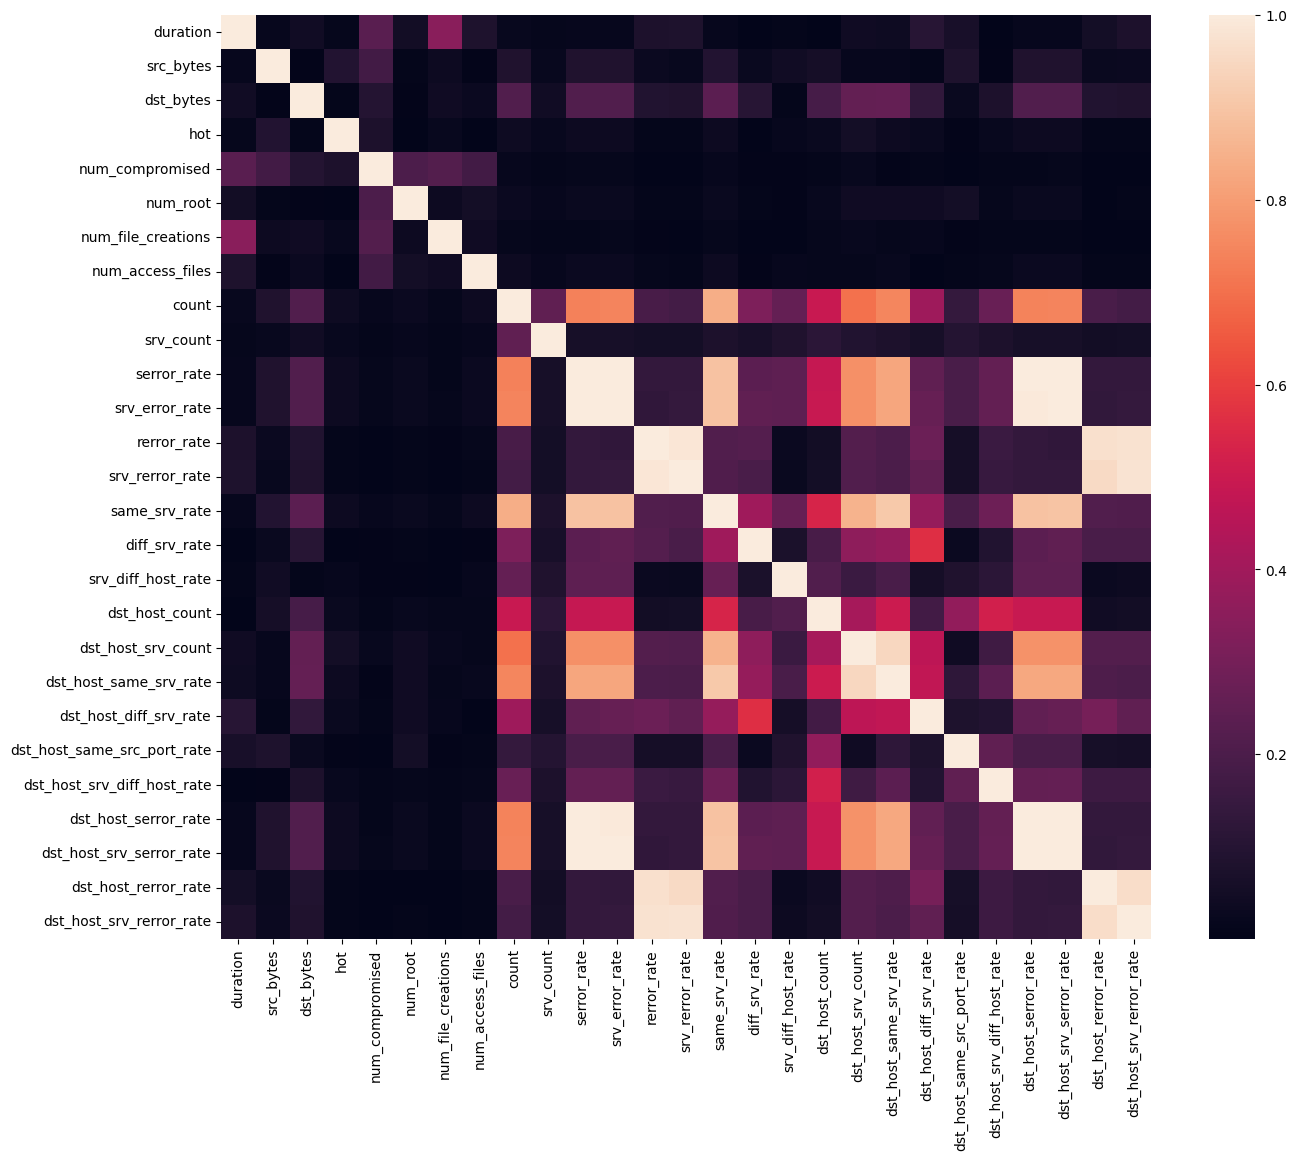

In [22]:
# checking for highly correlated columns
# Selecting only float columns for correlation analysis, since int are binary and object are categorical
float_columns = data.select_dtypes(include=['float64']).columns

corr_matrix = data[float_columns].corr().abs()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix)
plt.show()

In [23]:
# Identifying the  upper triangle of correlation matrix (to avoid duplicate checking)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.9)]

highly_correlated

['srv_error_rate',
 'srv_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [24]:
# dropping the highly correlated columns
data.drop(columns=highly_correlated, inplace=True)

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  object 
 2   service                      817551 non-null  object 
 3   flag                         817551 non-null  object 
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   hot                          817551 non-null  float64
 7   logged_in                    817551 non-null  int64  
 8   num_compromised              817551 non-null  float64
 9   root_shell                   817551 non-null  int64  
 10  su_attempted                 817551 non-null  int64  
 11  num_root                     817551 non-null  float64
 12  num_file_creations           817551 non-null  float64
 13 

In [26]:
from sklearn.preprocessing import StandardScaler

# Now we are doing One-Hot Encoding to categorical columns
data = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'], drop_first=True)

# Standard Scaling for the numerical columns which are Float Columns
numerical_columns = data.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# we are not doing anything to the binary columns which are int and are (0,1) values, because it will remove its purpose

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Columns: 103 entries, duration to flag_f9
dtypes: bool(78), float64(20), int64(4), object(1)
memory usage: 216.8+ MB
None


In [27]:
# converting the target column into 0 and 1 for the binary classification
data['attack'] = data['attack'].apply(lambda x: 1 if x == 'Normal' else 0)

print(data['attack'].value_counts())
print(data.info())


attack
1    576710
0    240841
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Columns: 103 entries, duration to flag_f9
dtypes: bool(78), float64(20), int64(5)
memory usage: 216.8 MB
None


In [39]:
# Importing necessary libraries for the machine learning modelling
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [40]:
# Splitting the Data
X = data.drop(columns=["attack"])
y = data["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
# Defining models with SMOTE inside Pipeline to avoid any type of data leakage
models = {
    "Logistic Regression": Pipeline([
        ("smote", SMOTE(sampling_strategy="auto", random_state=42)),
        ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]),
    "Random Forest": Pipeline([
        ("smote", SMOTE(sampling_strategy="auto", random_state=42)),
        ("model", RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42))
    ]),
    "SVM": Pipeline([
        ("smote", SMOTE(sampling_strategy="auto", random_state=42)),
        ("model", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))
    ])
}

In [43]:
# first checking with dummy classifier for the base line of evaluation of machine learning models
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print(f"Dummy Classifier Score: {dummy.score(X_test, y_test):.4f}")

Dummy Classifier Score: 0.7054


In [42]:
# Training & Evaluating
for name, model in models.items():
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    cv_score = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1", n_jobs=-1).mean()

    # Training on the balanced data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate
    print(f"\n{name}:")
    print(f"Cross-Validation F1 Score: {cv_score:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression:
Cross-Validation F1 Score: 0.9993
Confusion Matrix:
 [[ 48109     59]
 [   115 115228]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48168
           1       1.00      1.00      1.00    115343

    accuracy                           1.00    163511
   macro avg       1.00      1.00      1.00    163511
weighted avg       1.00      1.00      1.00    163511


Random Forest:
Cross-Validation F1 Score: 0.9999
Confusion Matrix:
 [[ 48152     16]
 [     1 115342]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48168
           1       1.00      1.00      1.00    115343

    accuracy                           1.00    163511
   macro avg       1.00      1.00      1.00    163511
weighted avg       1.00      1.00      1.00    163511


SVM:
Cross-Validation F1 Score: 0.9998
Confusion Matrix:
 [[ 48122     46]
 [    19

In [45]:
# 1. we will go with random forest for the binary classification,
# because SVM become slow with increasing size of dataset
# 2. Logistic Regression can also be used, but random forest is fast and accurate.
# 3. In real scenario we do not see such high f1 score, this is because the data
# we received is already precise and created only for learning purpose.